# Reading and Understanding Dataset

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [3]:
# Checking top 5 rows

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking data types

df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### `dteday` should be in datetime format but it is in object format. Hence convert it to datetime format 

In [5]:
df['dteday'] = pd.DatetimeIndex(df['dteday'])

In [6]:
# checking data types
'''
Now dteday is in datetime format and we extracted day from it as well
'''

df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [7]:
# Checking top 5 rows

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# checking the shape of dataframe

df.shape

(730, 16)

In [9]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# Checking info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
# checking for the missing value in column data
'''
From below results its clear that we dont have any missing values in dataset
'''

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# Lets rename few columns for easy readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [13]:
# Check the head of the dataset

df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# dropping the duplicates

'''
There is not duplicate records in the given dataset
'''

df.drop_duplicates(inplace=True)

df.shape

(730, 16)

In [15]:
# dropping the unwanted columns
'''
instant: It has only index for the row so not useful for modelling.
dteday: It has date which can be compensated by year,month and day column.
casual & registered: They seems to be the breakup by category for cnt column.
'''

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [16]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Encoding and mapping the of the column
'''
Some column like season,month,weekday and weathersit are given in ordinal fomat but they doont follow in ordinal treand, 
hence we need to map them to nominal format

weekday are calulate from date and check what 0-6 map to to which day of week
'''

df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['month'] = df['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df['weekday'] = df['weekday'].map({0: 'Tues', 1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon'})
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Misty',3:'Light_Snow',4:'Heavy_Rain'})

In [18]:
# check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tues,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# EDA on Dataset

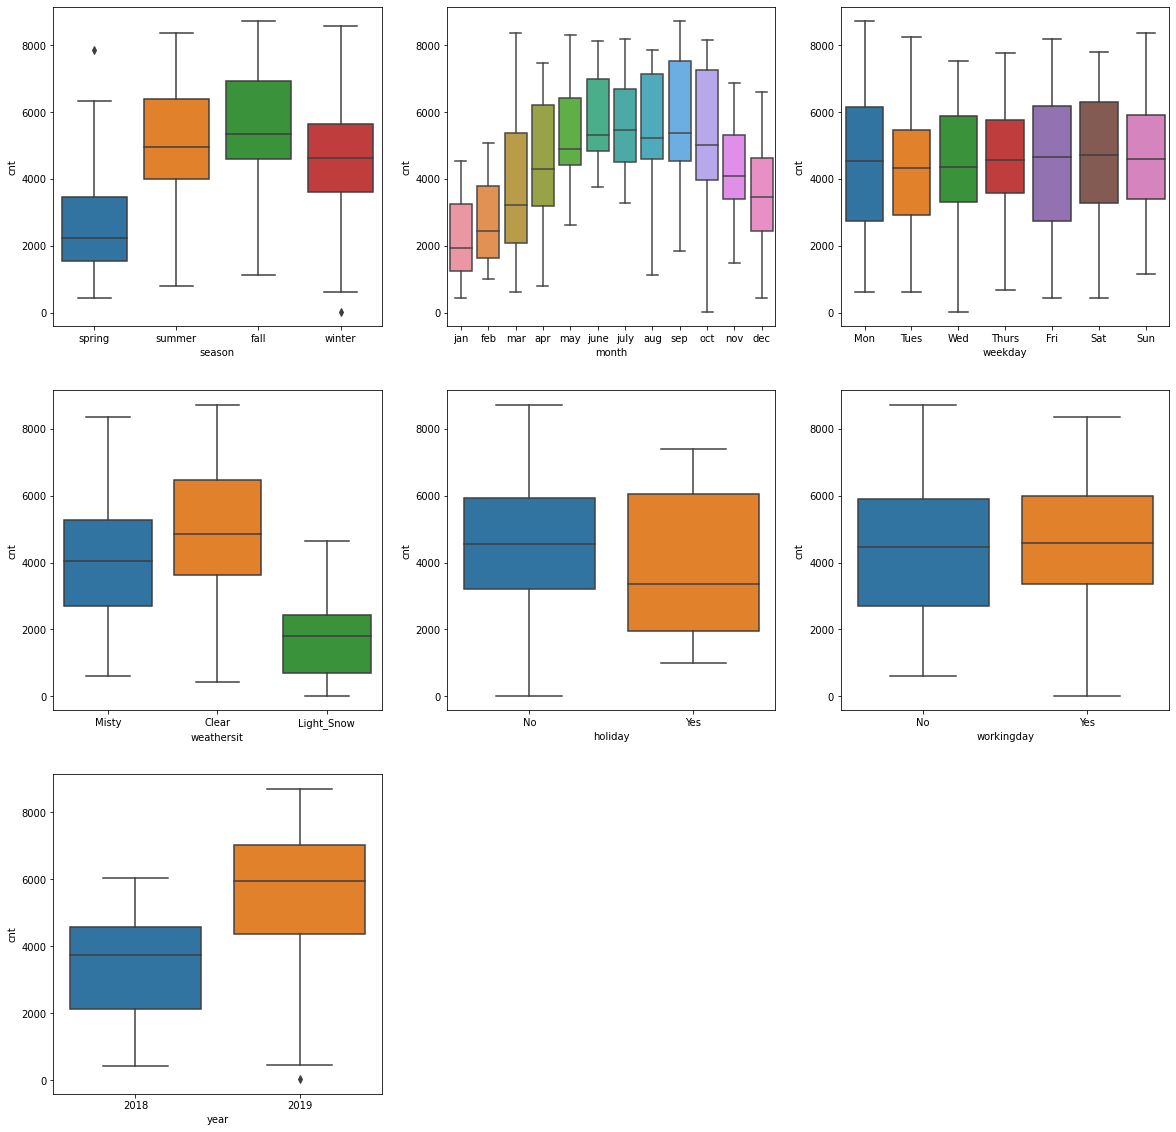

In [19]:
# lets visualize the categorical columns to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = df['season'], y = df['cnt'])
plt.subplot(3,3,2)
sns.boxplot(x = df['month'], y = df['cnt'])
plt.subplot(3,3,3)
sns.boxplot(x = df['weekday'], y = df['cnt'])
plt.subplot(3,3,4)
sns.boxplot(x = df['weathersit'], y = df['cnt'])
plt.subplot(3,3,5)
sns.boxplot(x = df['holiday'], y = df['cnt'])
plt.xticks([0,1],['No','Yes'])
plt.subplot(3,3,6)
sns.boxplot(x = df['workingday'], y = df['cnt'])
plt.xticks([0,1],['No','Yes'])
plt.subplot(3,3,7)
sns.boxplot(x = df['year'], y = df['cnt'])
plt.xticks([0,1],['2018','2019'])
plt.show()

#### Insites:

***1) Season*** : Out of all season `Fall` season has height bike sharing count<br>
***2) Months*** : `September` month has height bike sharing count<br>
***3) Weekday*** : Bike sharing counts increase on `Monday`,`Friday` and `Saturday`<br>
***4) Weathersit*** : `Clear` weather helps to increase bike sharing count<br>
***5) Year*** : As the year increasing the demand for bike sharing is also increasing drastically<br>

#### Lets deep dive into categorical variable and check its impact on target variables

In [21]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (15,6))
    plt.subplots_adjust(wspace=0.3)
    plt.subplot(1,2,1)
    sns.barplot(df[column],df['cnt'])
    plt.subplot(1,2,2)
    sns.barplot(df[column],df['cnt'], hue=df['year'])
    plt.legend(labels=['2018', '2019'])
    plt.show()

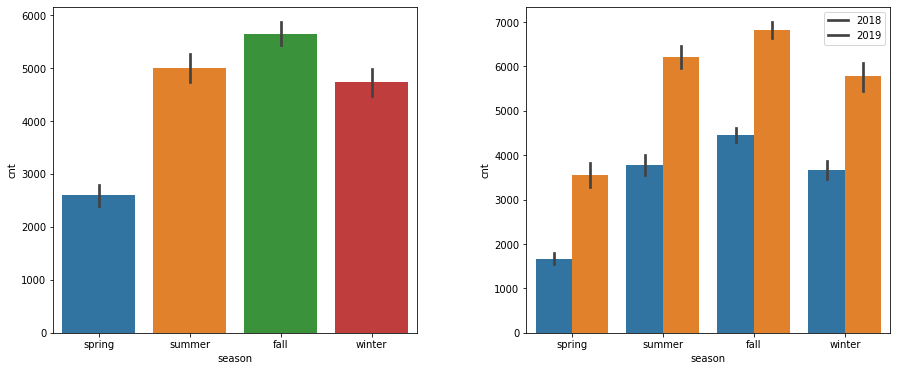

In [22]:
# Lets visualize for season column

plot_cat_columns('season')

#### Bike sharing count is highest in `Fall` season. And, in each season the booking count has increased drastically from 2018 to 2019.

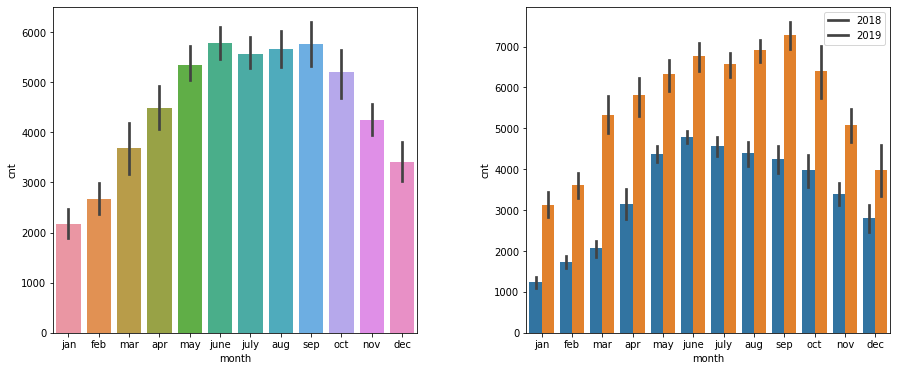

In [23]:
# Lets visualize for month column

plot_cat_columns('month')

#### The majority of bookings were made during the months between May and October. The trend climbed in the beginning of the year until the middle of the year, when it began to decline as we reached the end of the year. From 2018 to 2019, the number of bookings for each month appears to have grown.

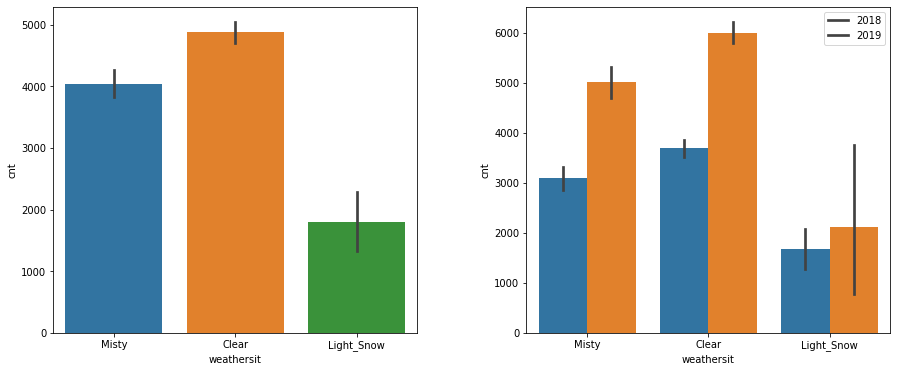

In [24]:
# Lets visualize for weathersit column

plot_cat_columns('weathersit')

#### It appears evident that clear weather drew more bookings. And, in contrast to the previous year, bookings for each weather condition increased in 2019.

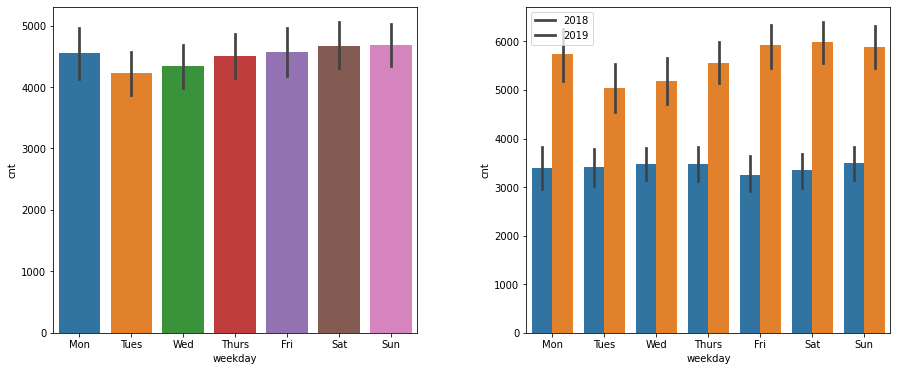

In [25]:
# Lets visualize for weekday column

plot_cat_columns('weekday')

#### Bookings are higher on Monday, Friday, and Saturday than other days of the week.

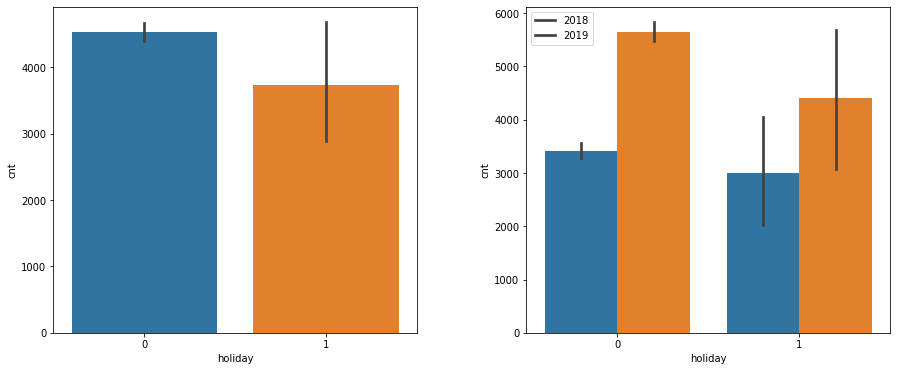

In [26]:
# Lets visualize for hoiday column

plot_cat_columns('holiday')

#### When there is a holiday, the amount of bookings appears to be lower, which seems reasonable.

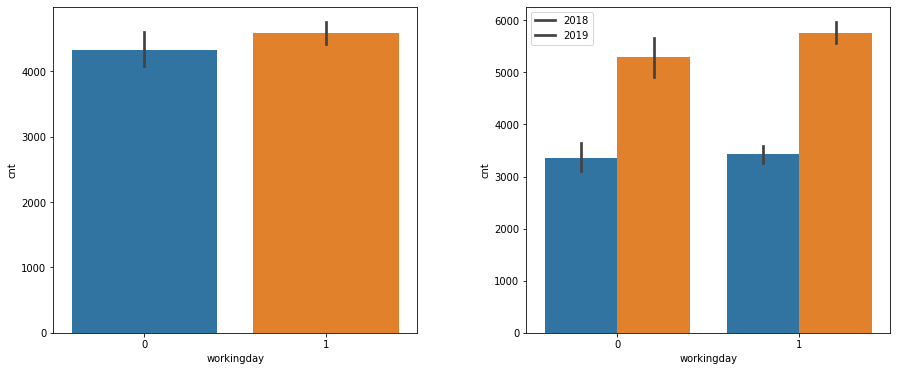

In [27]:
# Lets visualize for working column

plot_cat_columns('workingday')

#### Booking seems to be almost equal on working and non-working days. However, the number increased from 2018 to 2019.

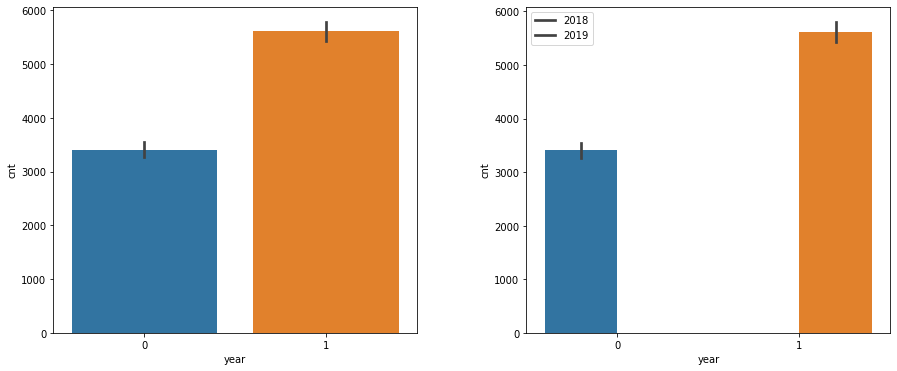

In [28]:
# Lets visualize for year column

plot_cat_columns('year')

#### 2019 saw an increase in bookings over the previous year, indicating solid company success.

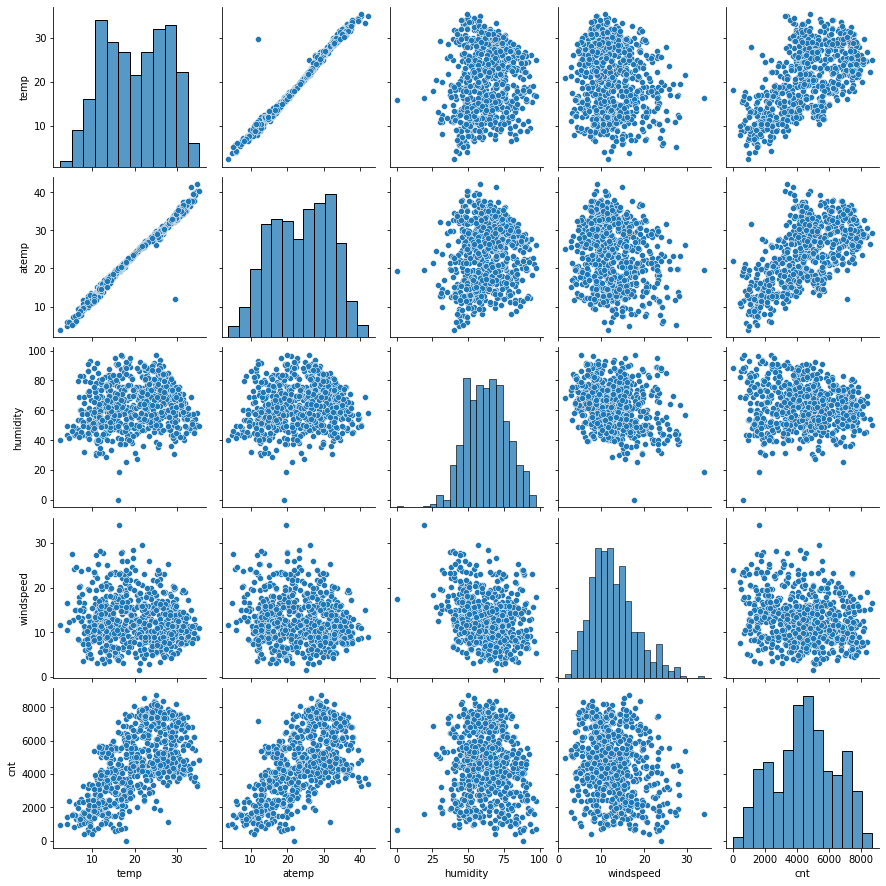

In [29]:
# visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

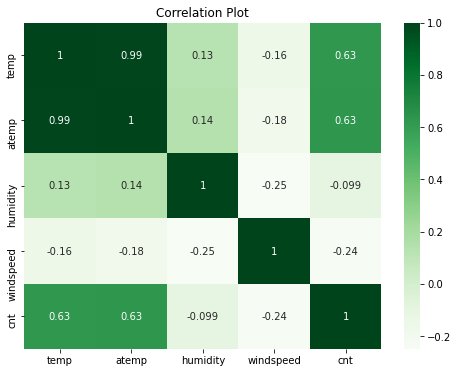

In [31]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (8,6))
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="Greens")
plt.title("Correlation Plot")
plt.show()

#### The relationship between temp and atemp is linear. Due to multicolinearity, one of the parameters can be included in the model. Based on the VIF and p-value in relation to other variables, we will pick which parameters to keep.

In [32]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tues,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Lets check the distribution of Numeric variables

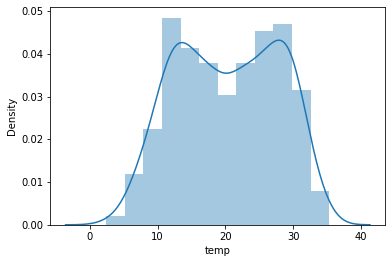

In [33]:
plt.figure(figsize = (6,4))
sns.distplot(df['temp']);

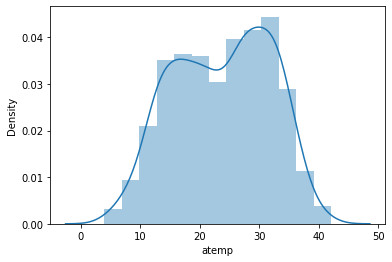

In [34]:
plt.figure(figsize = (6,4))
sns.distplot(df['atemp']);

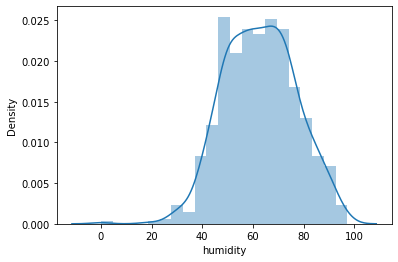

In [35]:
plt.figure(figsize = (6,4))
sns.distplot(df['humidity']);

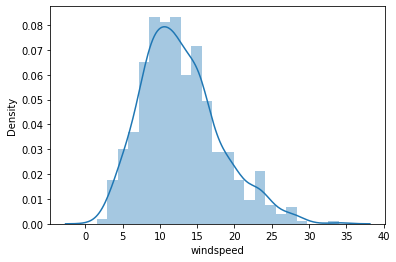

In [36]:
plt.figure(figsize = (6,4))
sns.distplot(df['windspeed']);

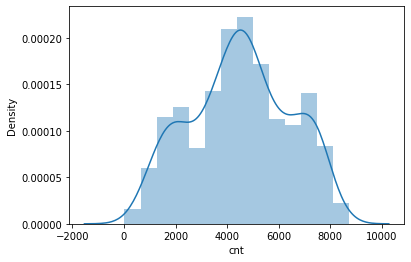

In [37]:
plt.figure(figsize = (6,4))
sns.distplot(df['cnt']);

#### Mostly all numeric variables are normally  distributes (close resemble to normal distribution)

# Data Preparation

In [38]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tues,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [39]:
# Create dummy varibales for categorical columns

seasons_df = pd.get_dummies(df['season'], drop_first=True)
months_df = pd.get_dummies(df['month'], drop_first=True)
weekdays_df = pd.get_dummies(df['weekday'], drop_first=True)
weathersit_df = pd.get_dummies(df['weathersit'], drop_first=True)

In [40]:
# Merging the original dataframe, with the dummy variable dataset.

df_new = pd.concat([df,seasons_df,months_df,weekdays_df,weathersit_df],axis=1)

In [41]:
# Lets drop the column for which created dummy

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [42]:
# Lets check the shape of new dataframe

df_new.shape

(730, 30)

In [43]:
# As the dataset size is high we will not able to analysise muticolinarity clearly so lets write code to check correlation
# of every column with other column and proting all column who has correlation above 60%

for i in range(len(df_new.columns)):
    for j in range(i+1,len(df_new.columns)):
        corr_value = df_new[df_new.columns[i]].corr(df_new[df_new.columns[j]])
        if corr_value > 0.6:
            print((df_new.columns[i],df_new.columns[j],round(corr_value,2)))

('temp', 'atemp', 0.99)
('temp', 'cnt', 0.63)
('atemp', 'cnt', 0.63)


#### From above we found out `temp` and `atemp` are highly correlated hence we need to drop one of those based on p-value and VIF. Both of them has good correlation with target variable which is good for modeling.

In [58]:
# splitting the dataframe into Train and Test

df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [59]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [60]:
# check the shape of testing datatset

df_test.shape

(220, 30)

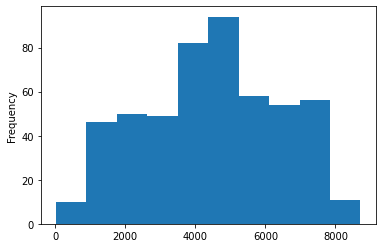

In [61]:
# Lets check train data disribution of target varible. This to marke sure that train data contain some records from 
# all range

df_train['cnt'].plot(kind='hist');

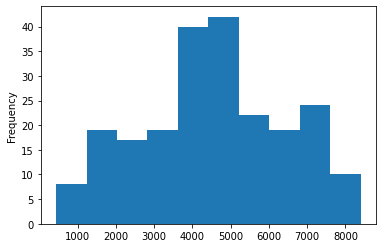

In [62]:
# Lets check test data disribution of target varible. This to make sure that test data has all range data and not biase 
# toward particular range only. This will give us correct model performance.

df_test['cnt'].plot(kind='hist');

In [63]:
# Lets scale data using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [64]:
# Dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_Snow,Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [65]:
# Lets apply scalling to all continous variable

cont_var = ['temp','atemp','humidity','windspeed','cnt']
df_train[cont_var] = scaler.fit_transform(df_train[cont_var])

In [66]:
# Dataset after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_Snow,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [67]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_Snow,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Engineering and Model Building

In [68]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [69]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [70]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', False, 3),
 ('oct', False, 12),
 ('sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 14),
 ('Sun', False, 11),
 ('Thurs', False, 10),
 ('Tues', True, 1),
 ('Wed', False, 9),
 ('Light_Snow', True, 1),
 ('Misty', True, 1)]

In [71]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'july', 'sep', 'Mon', 'Tues',
       'Light_Snow', 'Misty'],
      dtype='object')


In [72]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'Sat', 'Sun', 'Thurs', 'Wed'],
      dtype='object')

In [73]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [74]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [75]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
11,Mon,12.20
12,Tues,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.62
4,humidity,1.91
14,Misty,1.57


**workingday has very high VIF value**

# Building a linear model using stats models

In [76]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 29 Oct 2022   Prob (F-statistic):          2.11e-191
Time:                        10:01:43   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.028      7.200      0.0

**As `holiday` has very high p-value lets drop it first and again check VIF and P-value for rest of the column**

In [77]:
# As holiday shows high P-values hence we can drop it
X_train_m2 = X_train_rfe.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_m2)

,Features,VIF
3,humidity,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,Mon,4.91
5,spring,4.80
11,Tues,4.76
7,winter,3.69
6,summer,3.04
13,Misty,2.31


**After dropping `holiday` column VIF for `workingday` drop significantly. But still its quite high lets check p-value. For `humidity` it increases.**

In [78]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_m2)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 29 Oct 2022   Prob (F-statistic):          2.11e-191
Time:                        10:02:22   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1811      0.042      4.301      0.0

**As all column has low p-value lets drop `humidity` as has very high VIF**

In [79]:
# As Sun shows high P-values hence we can drop it
X_train_m3 = X_train_m2.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_m3)

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
9,Mon,4.45
10,Tues,4.21
4,spring,3.82
6,winter,2.78
5,summer,2.76
0,year,2.07
7,july,1.60


**`workingday` has highest VIF lets check p-value**

In [80]:
# Building 3nd linear regression model

X_train_lm_3 = sm.add_constant(X_train_m3)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sat, 29 Oct 2022   Prob (F-statistic):          1.28e-188
Time:                        10:04:54   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1008      0.038      2.624      0.0

**As all column has low p-value lets drop `workingday` as has very high VIF**

In [81]:
# As humidity shows high VIF hence we can drop it
X_train_m4 = X_train_m3.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_m4)

,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,summer,2.24
3,spring,2.11
0,year,2.07
5,winter,1.82
6,july,1.59
11,Misty,1.55
7,sep,1.33
8,Mon,1.22


**Except `temp` all column VIF are withing range**

In [82]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_m4)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sat, 29 Oct 2022   Prob (F-statistic):          2.06e-186
Time:                        10:06:02   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2003      0.030      6.760      0.0

**Lets drop `Mon` as it have high p-value**

In [83]:
# As humidity shows high VIF hence we can drop it
X_train_m5 = X_train_m4.drop(['Mon'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_m5)

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,summer,2.23
3,spring,2.09
0,year,2.07
5,winter,1.80
6,july,1.59
10,Misty,1.55
7,sep,1.33
8,Tues,1.17


In [84]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_m5)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Sat, 29 Oct 2022   Prob (F-statistic):          3.37e-187
Time:                        10:08:06   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2034      0.030      6.877      0.0

**As all p-value and VIF values are withing range**

#### We can consider the above model i.e lr_5, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

#### F-Statistics value of 230.0 (which is greater than 1) and the p-value of 3.37e-187 i.e almost equals to zero, states that the overall model is significant

In [85]:
# Checking the parameters and their coefficient values
lr_5.params

const         0.203387
year          0.233876
temp          0.491742
windspeed    -0.149694
spring       -0.068197
summer        0.047885
winter        0.081830
july         -0.048253
sep           0.072321
Tues         -0.044959
Light_Snow   -0.284654
Misty        -0.080237
dtype: float64

# Validation and Residual analysis of train data

In [86]:
X_train_lm_5.head()

,const,year,temp,windspeed,spring,summer,winter,july,sep,Tues,Light_Snow,Misty
576,1.0,1,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,0,0,0,1
728,1.0,1,0.245101,0.663106,1,0,0,0,0,1,0,0
482,1.0,1,0.395666,0.188475,0,1,0,0,0,0,0,1
111,1.0,0,0.345824,0.380981,0,1,0,0,0,0,0,1


In [87]:
y_train_pred = lr_5.predict(X_train_lm_5)

### Normality of error terms

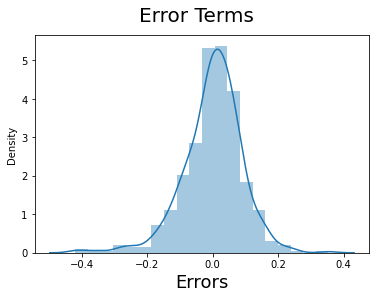

In [88]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18);

**Error terms are following normal distribution**

### Multi Collinearity

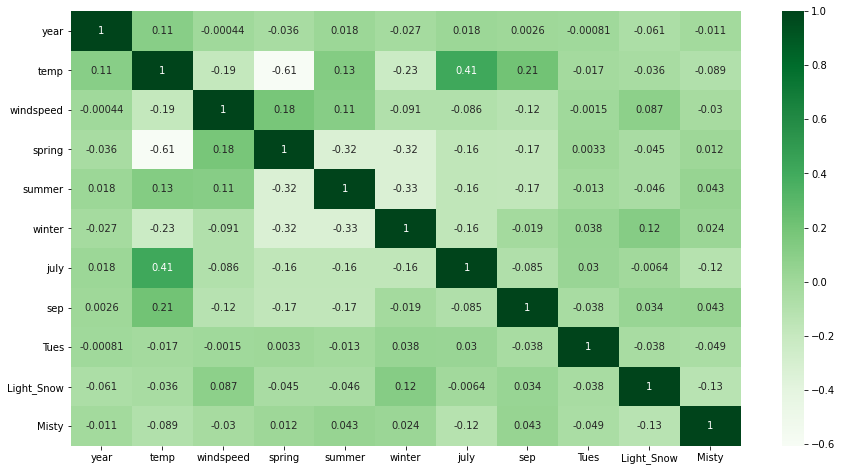

In [89]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_m5.corr(),annot = True, cmap="Greens")
plt.show()

**There is no multi-colinearity as seen from the heatmap as all values are below 70%.**

### Linearity

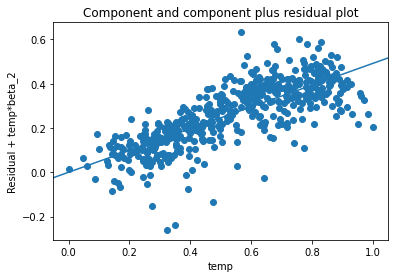

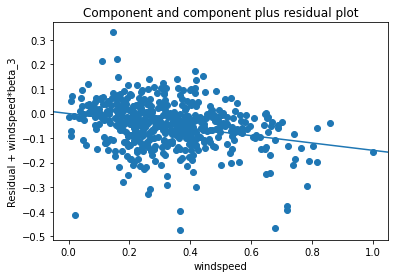

In [90]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

**Linearity can be observed from above visualizations.**

### Homoscedasticity

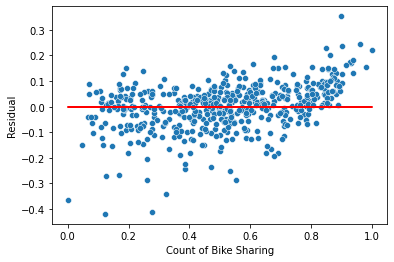

In [91]:
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count of Bike Sharing')
plt.ylabel('Residual')
plt.show()

**There is no particular pattern in the residual plot above. Also, the final model's Durbin-Watson value is 2.019, indicating that there is no autocorrelation.**

# Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [92]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_Snow,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [93]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_Snow,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
y_test = df_test.pop('cnt')
X_test = df_test

In [96]:
col1 = X_train_m5.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [97]:
y_pred = lr_5.predict(X_test_lm_5)

In [98]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8058

# Model Evaluation

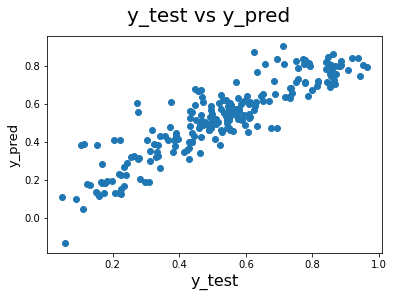

In [100]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 16)
plt.ylabel('y_pred', fontsize = 13);

In [101]:
round(lr_5.params,4)

const         0.2034
year          0.2339
temp          0.4917
windspeed    -0.1497
spring       -0.0682
summer        0.0479
winter        0.0818
july         -0.0483
sep           0.0723
Tues         -0.0450
Light_Snow   -0.2847
Misty        -0.0802
dtype: float64

### The best fitting Line equation is shown below:

***y_pred = 0.2034 * const + 0.2339 * year + 0.4917 * temp - 0.1497 * windspeed - 0.0682 * spring + 0.0479 * summar + 0.0818 * winter - 0.0483 * july + 0.0723 * sep - 0.0450 * Tues -0.2847 * Light_Snow - 0.0802 * Misty***

In [102]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7955


# Model Performance on Training and Testing dataset:
    ▪ Train dataset R^2          : 0.836
    ▪ Test dataset R^2           : 0.8058
    ▪ Train dataset Adjusted R^2 : 0.832 
    ▪ Test dataset Adjusted R^2  : 0.7955

#### Demand of bikes depend on `year`, `temp`, `windspeed`, `spring`, `summer`, `winter`, `july`, `sep`, `Tues`, `Light_Snow` and `Misty`.